<a href="https://colab.research.google.com/github/d0artG/Page-View-Time-Series-Visualizer/blob/main/testes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()


In [35]:
# Import data (Make sure to parse dates. Consider setting index column to 'date'.)
df = pd.read_csv("fcc-forum-pageviews.csv", index_col=0, parse_dates = True, names=["date","views"], header=0)

df

,views
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933
...,...
2019-11-29,171584
2019-11-30,141161
2019-12-01,142918


In [36]:
# Clean data
df = df.drop(df[(df['views'] > df['views'].quantile(0.975)) |(df['views'] < df['views'].quantile(0.025))].index)
df

,views
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325
...,...
2019-11-24,138875
2019-11-29,171584
2019-11-30,141161


In [23]:
def draw_line_plot():
    # Draw line plot
    fig,ax=plt.subplots()
    ax=plt.plot(df.index,df["views"])
    plt.title("Daily freeCodeCamp Forum Page Views 5/2016-12/2019")
    plt.xlabel("Date")
    plt.ylabel("Page Views")

    # Save image and return fig (don't change this part)
    fig.savefig('line_plot.png')
    return fig

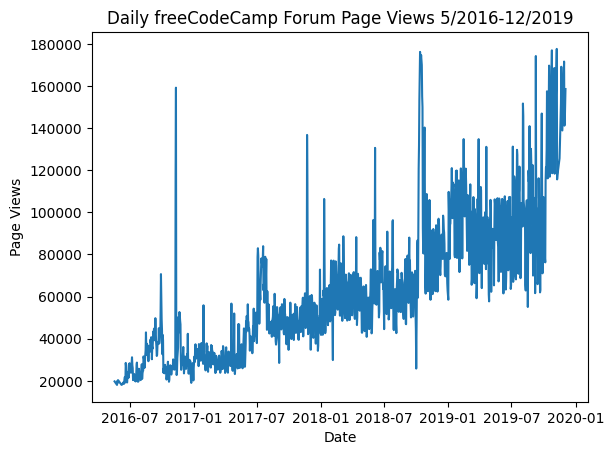

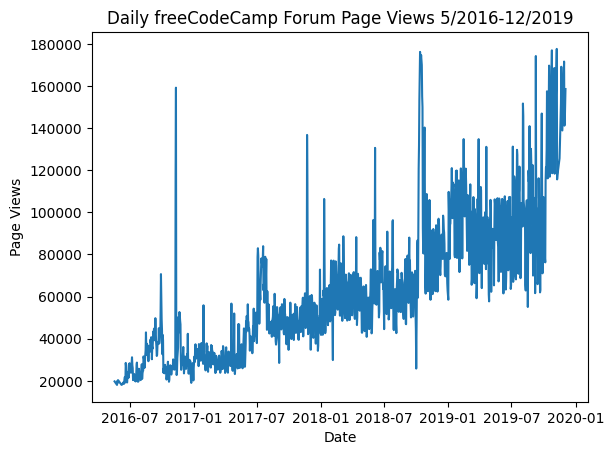

In [38]:
draw_line_plot()

In [129]:
df_bar=df
df_bar["year"] = df_bar.index.year
df_bar["month"] = df_bar.index.month_name()
#df_bar=df_bar.groupby(["year","month"]).mean().reset_index()
df_bar

,views,Year,year,month
date,,,,
2016-05-19,19736,2016,2016,May
2016-05-26,18060,2016,2016,May
2016-05-27,19997,2016,2016,May
2016-05-28,19044,2016,2016,May
2016-05-29,20325,2016,2016,May
...,...,...,...,...
2019-11-24,138875,2019,2019,November
2019-11-29,171584,2019,2019,November
2019-11-30,141161,2019,2019,November


[Text(0.5, 0, 'Years'), Text(0, 0.5, 'Average Page Views')]

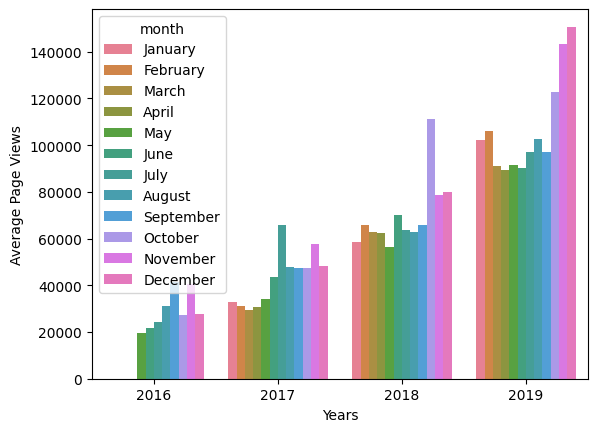

In [122]:
fig,ax=plt.subplots()
ax=sns.barplot(data=df_bar, x="year",y="views", hue="month", hue_order=["January", "February", "March", "April","May", "June", "July", "August", "September", "October", "November", "December"])
ax.set(xlabel='Years', ylabel='Average Page Views')

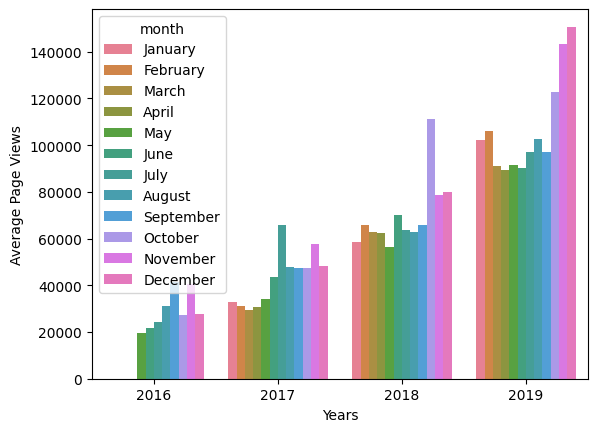

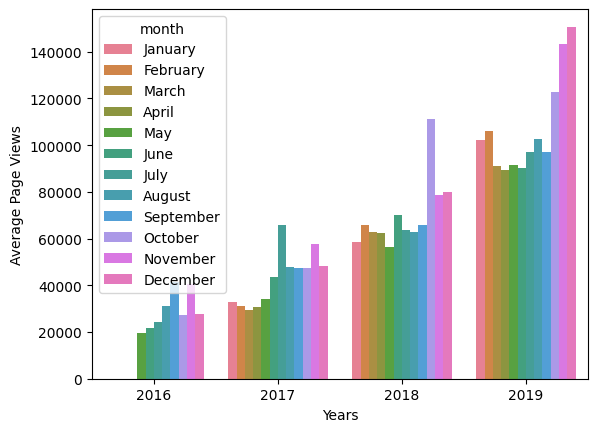

In [133]:
def draw_bar_plot():
    # Copy and modify data for monthly bar plot
    df_bar=df
    df_bar["year"] = df_bar.index.year
    df_bar["month"] = df_bar.index.month_name()
    df_bar=df_bar.groupby(["year","month"]).mean().reset_index()

    # Draw bar plot
    fig,ax=plt.subplots()
    ax=sns.barplot(data=df_bar, x="year",y="views", hue="month", hue_order=["January", "February", "March", "April","May", "June", "July", "August", "September", "October", "November", "December"])
    ax.set(xlabel='Years', ylabel='Average Page Views')


    # Save image and return fig (don't change this part)
    fig.savefig('bar_plot.png')
    return fig
draw_bar_plot()